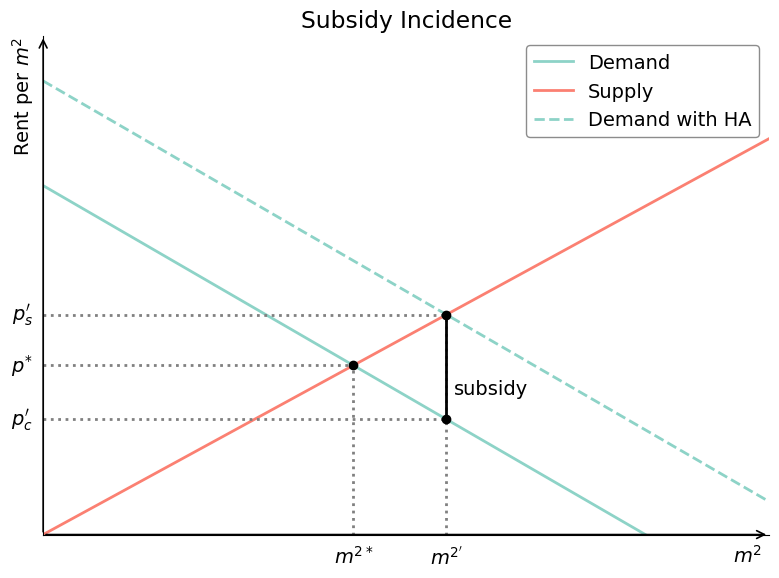

In [ ]:
# Subsidy Incidence Diagram — equilibrium shifted left
# Downward-sloping demand, upward-sloping supply, demand shifts up by a subsidy.
# Labels use letters only. Equilibrium now occurs further left on the x-axis.

import numpy as np
import matplotlib.pyplot as plt

# plotting
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

# Set color cycle
cmap = plt.colormaps['Set3']
colors = cmap(np.liwnspace(0, 1, 5))   # 5 distinct colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# --- 1) Steeper curves + tighter intercept gap to push q* left ---
# Demand: p = a - b q
# Supply: p = c + d q
a, b = 10.0, 8.5    # steeper demand
c, d = 0.0, 8.0     # steeper supply, close to demand intercept
s = 3.0             # per-unit subsidy (upward shift in demand)

# --- 2) Equilibria ---
q_star = (a - c) / (b + d)
p_star = c + d * q_star

q_new = (a + s - c) / (b + d)
p_s_new = c + d * q_new           # producer price
p_c_new = p_s_new - s             # consumer price (after subsidy)

# --- 3) Curves for plotting ---
q_max = max(q_new, q_star) * 1.8
q = np.linspace(0, q_max, 400)
D0 = a - b * q
S  = c + d * q
D1 = a + s - b * q

fig, ax = plt.subplots(figsize=(8, 6))

# --- 4) Draw curves ---
ax.plot(q, D0, lw=2, label="Demand")
ax.plot(q, S,  lw=2, label="Supply")
ax.plot(q, D1, lw=2, ls="--", label="Demand with HA", color=colors[0])

# --- 5) Original equilibrium (q*, p*) ---
ax.scatter([q_star], [p_star], color="black", zorder=5)
ax.plot([q_star, q_star], [0, p_star], color="gray", lw=2, ls=":")
ax.plot([0, q_star], [p_star, p_star], color="gray", lw=2, ls=":")
ax.text(q_star, -0.3, r"$m^{2*}$", ha="center", va="top")
ax.text(-0.02, p_star, r"$p^{*}$", ha="right", va="center")

# --- 6) New equilibrium (q', p_c', p_s') ---
ax.scatter([q_new], [p_s_new], color="black", zorder=5)
ax.scatter([q_new], [p_c_new], color="black", zorder=5)
ax.plot([q_new, q_new], [0, p_s_new], color="gray", lw=2, ls=":")
ax.text(q_new, -0.3, r"$m^{2'}$", ha="center", va="top")

ax.plot([0, q_new], [p_c_new, p_c_new], color="gray", lw=2, ls=":")
ax.plot([0, q_new], [p_s_new, p_s_new], color="gray", lw=2, ls=":")
ax.text(-0.02, p_c_new, r"$p_c'$", ha="right", va="center")
ax.text(-0.02, p_s_new, r"$p_s'$", ha="right", va="center")

# --- 7) Subsidy wedge at q' ---
ax.plot([q_new, q_new], [p_c_new, p_s_new], color="black", lw=2)
ax.text(q_new + 0.01*q_max, (p_c_new + 0.8*p_s_new) / 2, r"subsidy", va="center")

# --- 9) Axes styling (letters only) ---
ax.set_xlim(0, q_max )
y_min = 0
y_max = max(D1.max(), S.max(), p_s_new) * 1.1
ax.set_ylim(y_min, y_max)
ax.set_xlabel(r"$m^2$")
ax.set_ylabel(r"Rent per $m^2$")
# Move x-label to the far right (end of x-axis)
ax.xaxis.set_label_coords(0.97, -0.02)   # (x, y) in axis coordinates
# Move y-label to the top (end of y-axis)
ax.yaxis.set_label_coords(-0.01, 0.88)   # (x, y) in axis coordinates
ax.set_xticks([])
ax.set_yticks([])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("data", 0))
ax.annotate("", xy=(q_max, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=1.2))
ax.annotate("", xy=(0, y_max), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=1.2))

ax.set_title('Subsidy Incidence')

ax.legend(frameon=True, edgecolor='gray', facecolor='white', framealpha=0.9)

plt.tight_layout()
plt.show()
